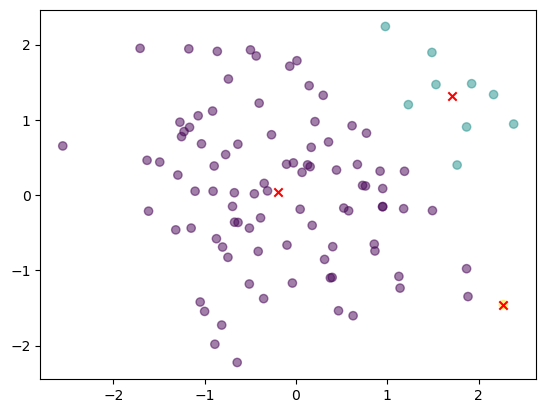

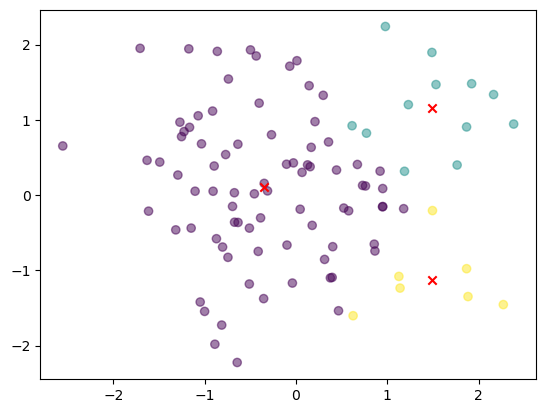

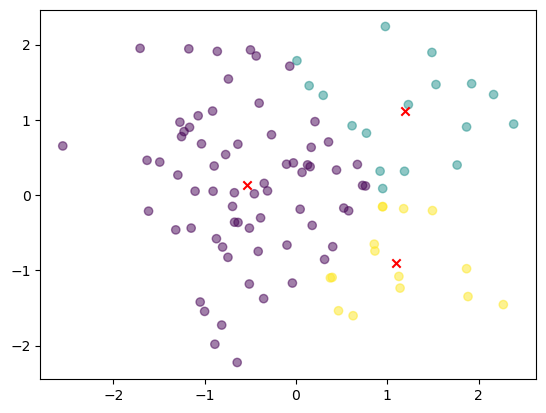

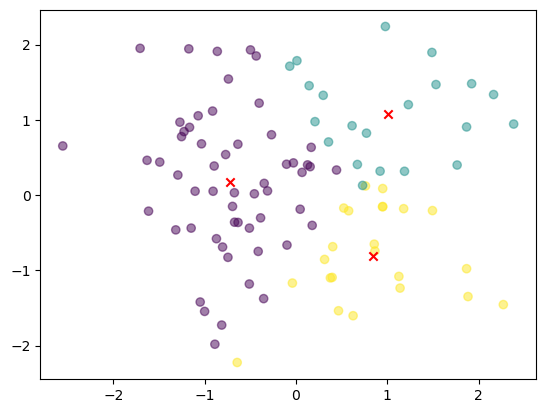

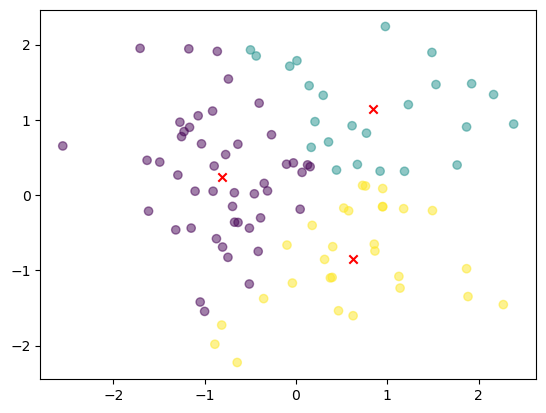

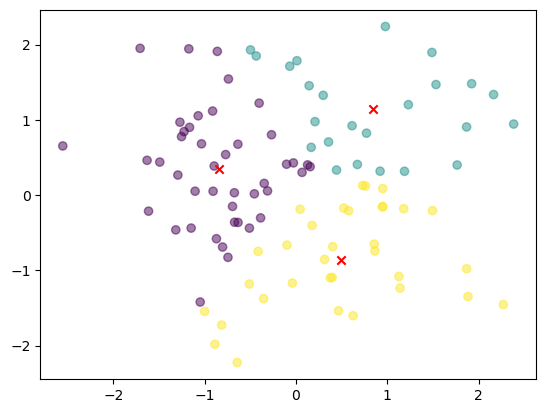

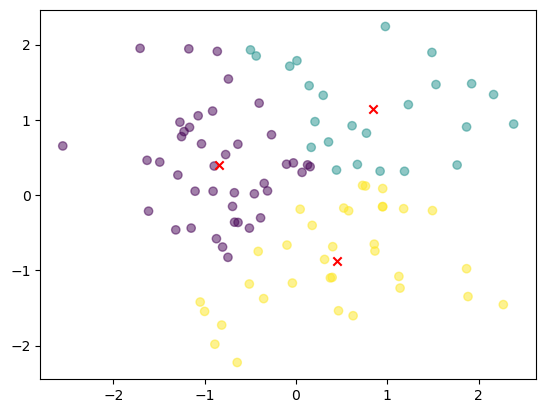

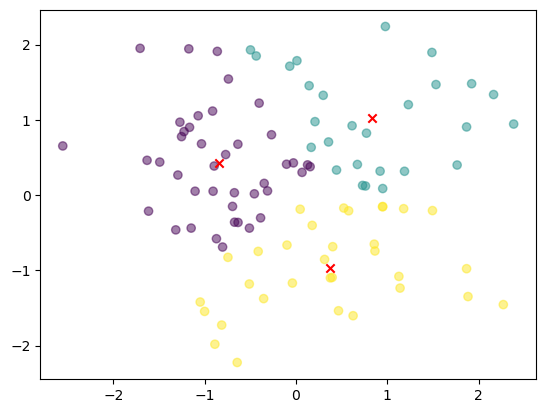

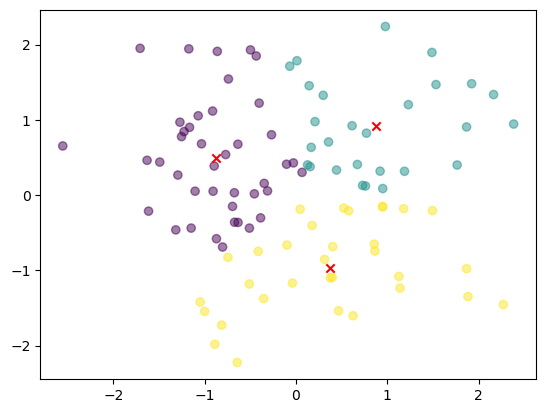

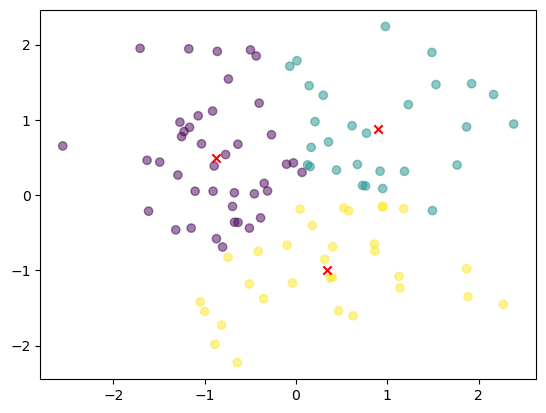

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class KMeansVisualizer:
    def __init__(self, n_clusters, n_points, n_iterations):
        self.n_clusters = n_clusters
        self.n_points = n_points
        self.n_iterations = n_iterations
        self.points = None
        self.centroids = None
        self.assignments = None

    def initialize(self):
        np.random.seed(0)
        self.points = np.random.randn(self.n_points, 2)
        self.centroids = np.random.randn(self.n_clusters, 2) * 3

    def compute_distances(self):
        distances = np.linalg.norm(self.points[:, None, :] - self.centroids, axis=2)
        self.assignments = np.argmin(distances, axis=1)

    def update_centroids(self):
        for i in range(self.n_clusters):
            self.centroids[i] = np.mean(self.points[self.assignments == i], axis=0)

    def visualize(self):
        plt.figure()
        plt.scatter(self.points[:, 0], self.points[:, 1], c=self.assignments, cmap='viridis', alpha=0.5)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x')
        plt.show()

    def run(self):
        self.initialize()
        for i in range(self.n_iterations):
            self.compute_distances()
            self.update_centroids()
            self.visualize()

if __name__ == '__main__':
    visualizer = KMeansVisualizer(n_clusters=3, n_points=100, n_iterations=10)
    visualizer.run()


C:\Users\samue\AppData\Local\Temp\ipykernel_14920\1359500668.py:24: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([self.points[self.assignments == k].mean(axis=0) for k in range(self.n_clusters)])


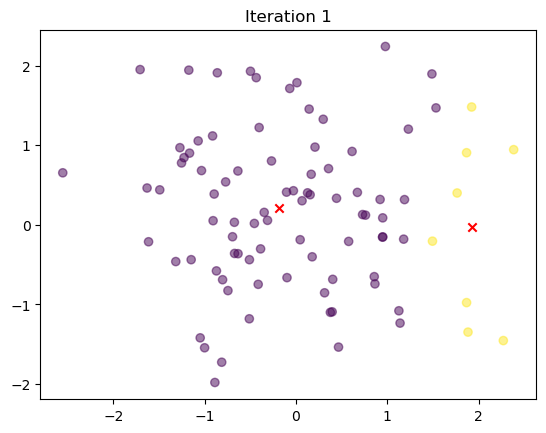

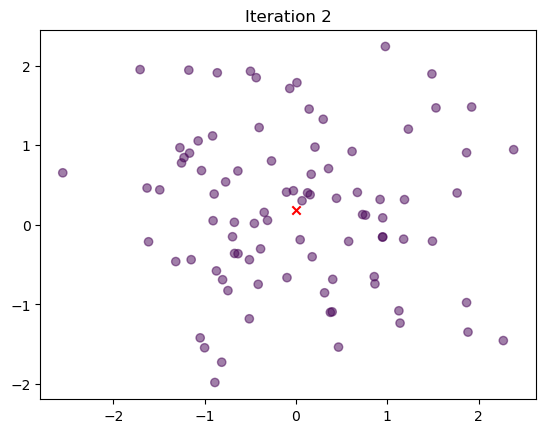

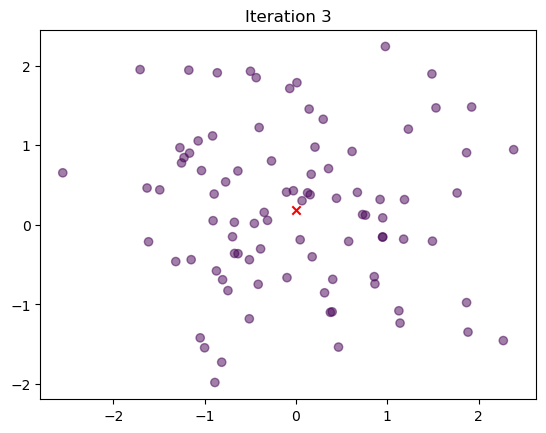

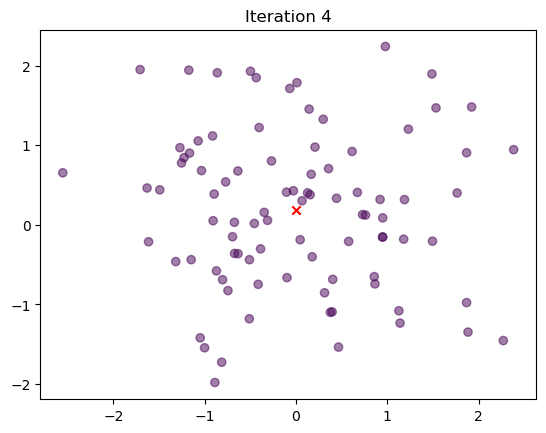

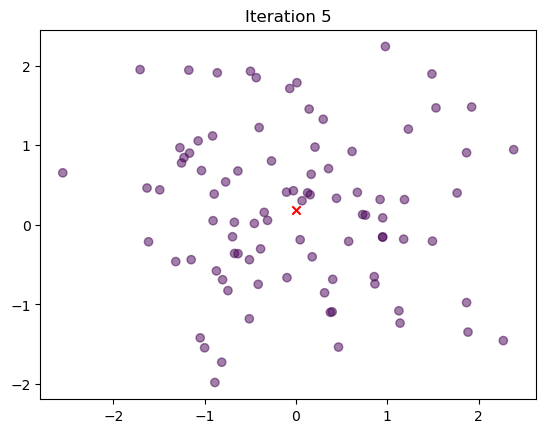

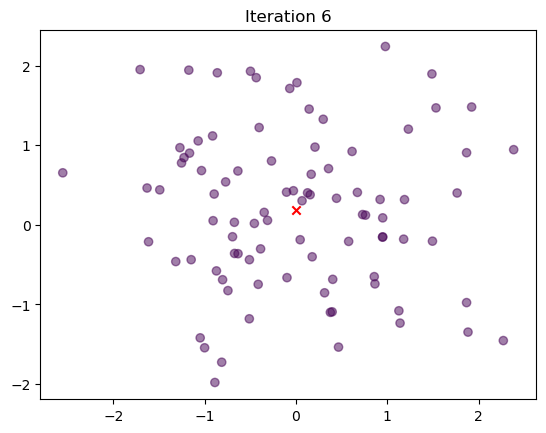

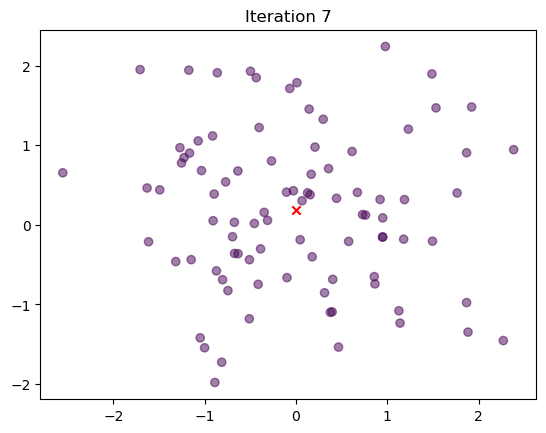

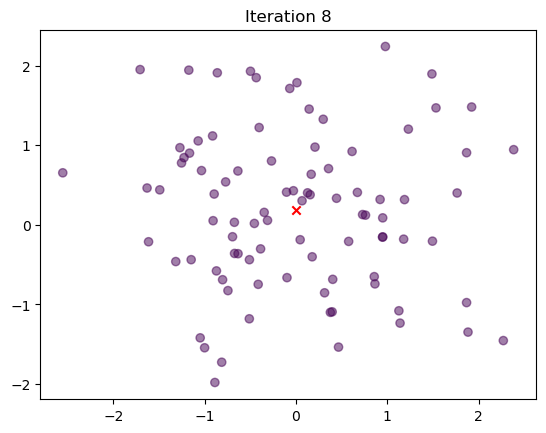

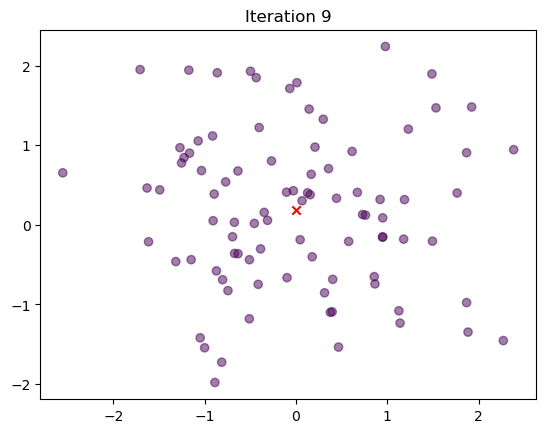

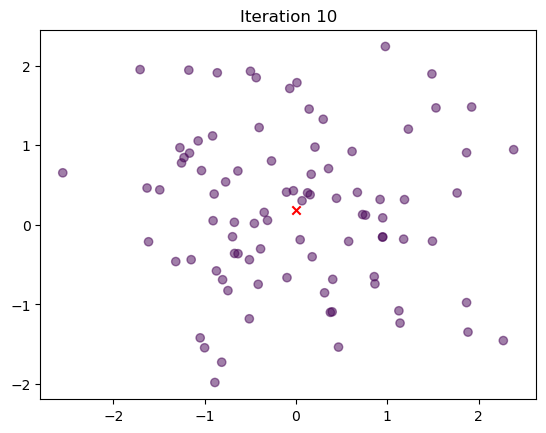

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

class KMeansVisualizer:
    def __init__(self, n_clusters, n_points, n_iterations):
        self.n_clusters = n_clusters
        self.n_points = n_points
        self.n_iterations = n_iterations
        self.points = None
        self.centroids = None
        self.assignments = None

    def initialize(self):
        np.random.seed(0)
        self.points = np.random.randn(self.n_points, 2)
        self.centroids = np.random.randn(self.n_clusters, 2) * 3

    def compute_distances(self):
        distances = np.linalg.norm(self.points[:, None, :] - self.centroids, axis=2)
        self.assignments = np.argmin(distances, axis=1)

    def update_centroids(self):
        new_centroids = np.array([self.points[self.assignments == k].mean(axis=0) for k in range(self.n_clusters)])
        if np.all(new_centroids == self.centroids):
            return False
        self.centroids = new_centroids
        return True

    def visualize(self, iteration):
        plt.figure()
        plt.scatter(self.points[:, 0], self.points[:, 1], c=self.assignments, cmap='viridis', alpha=0.5)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x')
        plt.title(f"Iteration {iteration}")
        plt.show()

    def run(self):
        self.initialize()
        for i in range(self.n_iterations):
            self.compute_distances()
            if not self.update_centroids():
                break
            self.visualize(i+1)


if __name__ == '__main__':
    # Replace these with your own dataset and true clusters for more accurate visualization
    true_centroids = np.array([[2, 2], [-2, -2], [2, -2]])
    true_assignments = np.concatenate([np.full(30, i) for i in range(3)])

    visualizer = KMeansVisualizer(n_clusters=3, n_points=90, n_iterations=10)
    visualizer.points = np.concatenate([np.random.randn(30, 2) + true_centroids[i] for i in range(3)])
    visualizer.centroids = deepcopy(true_centroids)
    visualizer.assignments = deepcopy(true_assignments)
    visualizer.run()


C:\Users\samue\AppData\Local\Temp\ipykernel_14128\3935022661.py:24: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([self.points[self.assignments == k].mean(axis=0) for k in range(self.n_clusters)])
C:\Users\samue\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


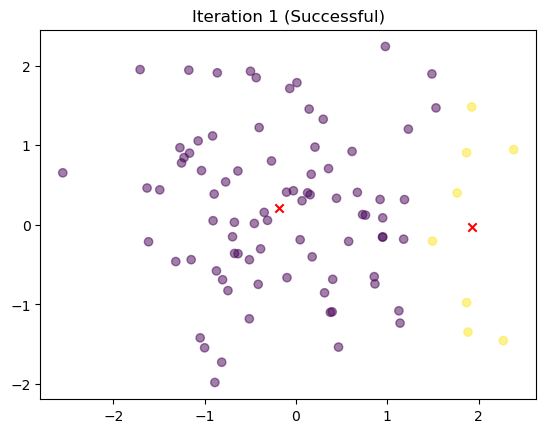

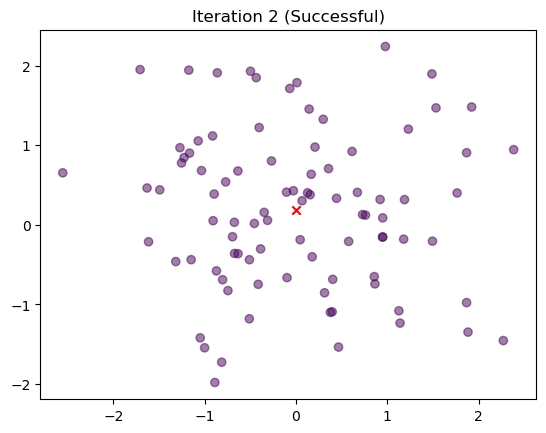

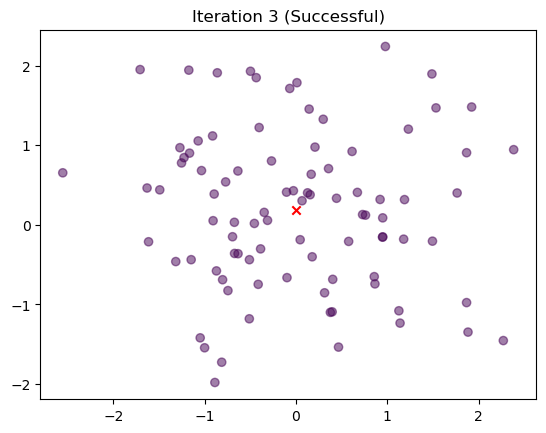

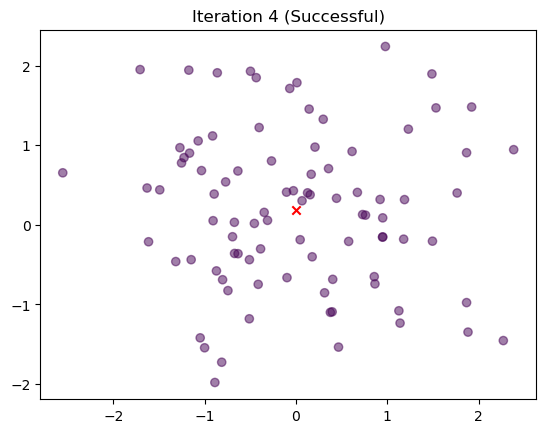

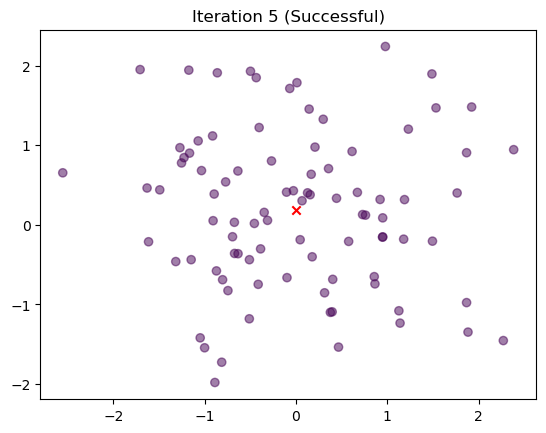

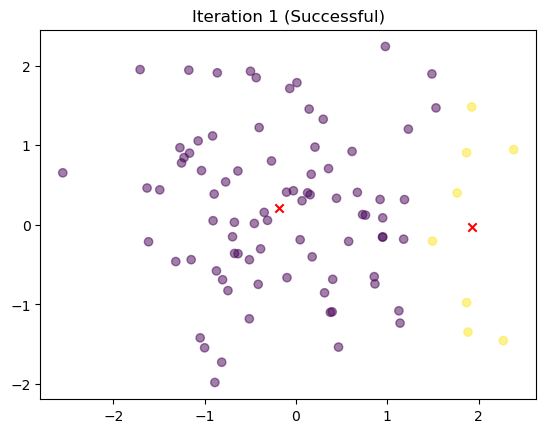

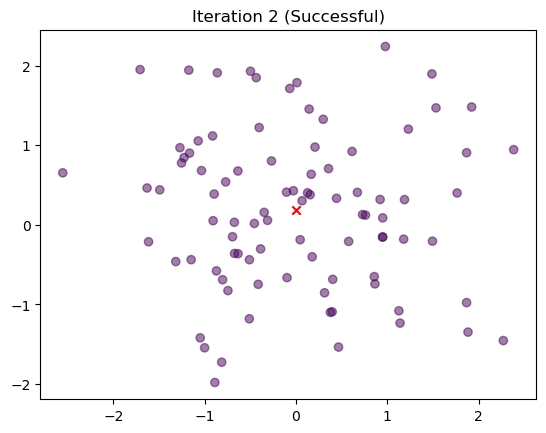

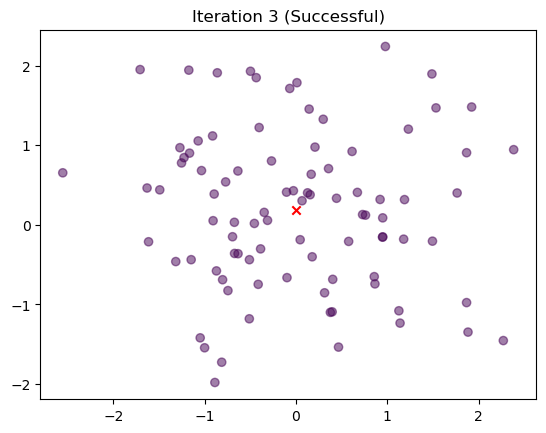

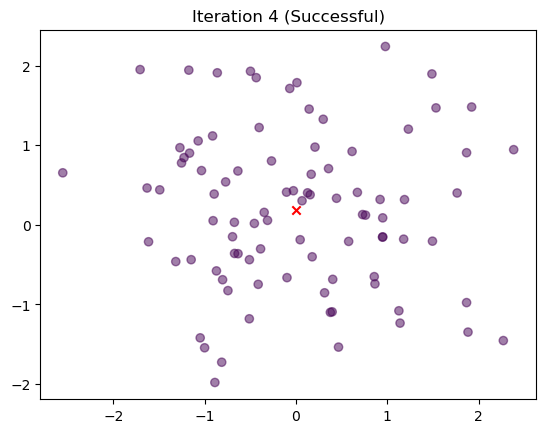

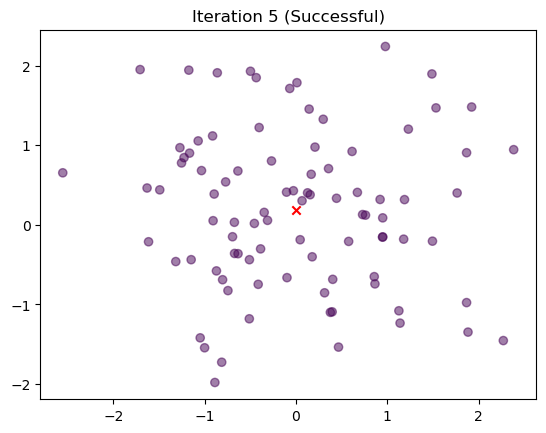

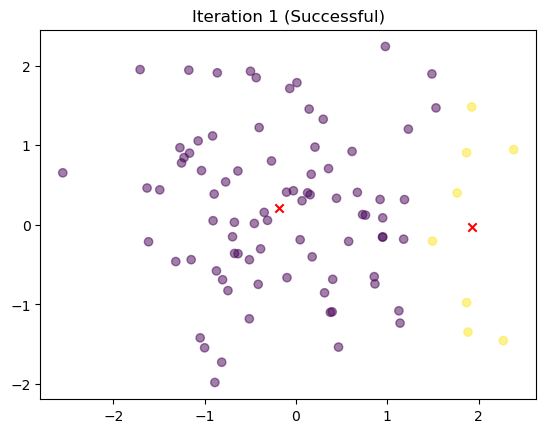

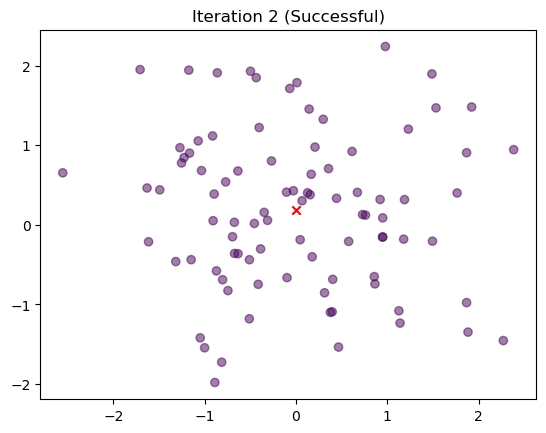

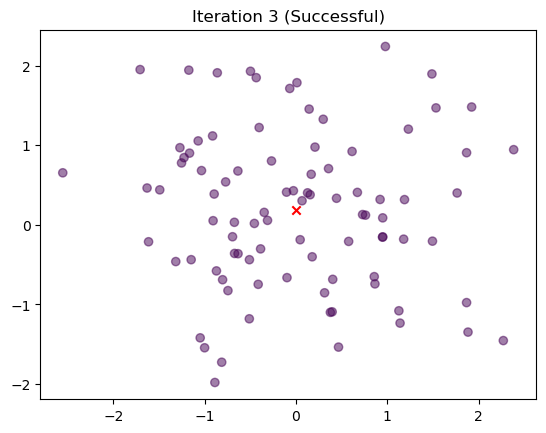

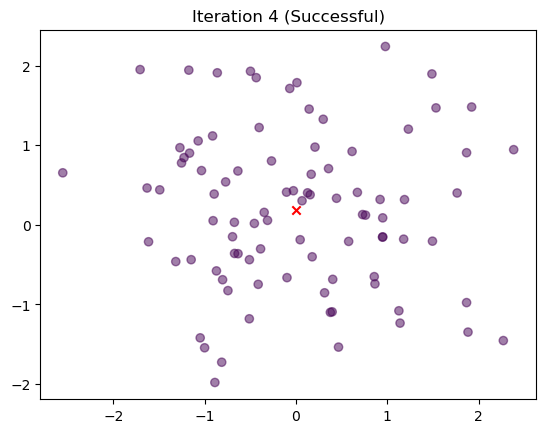

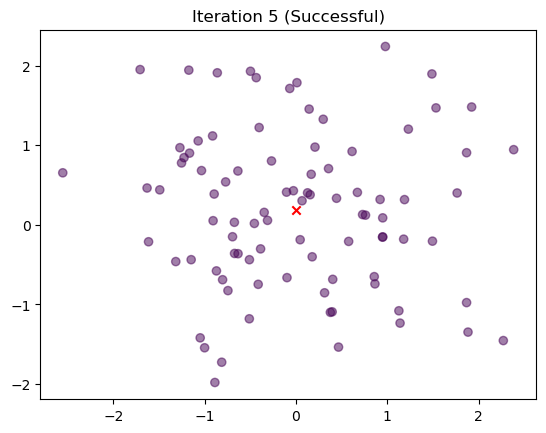

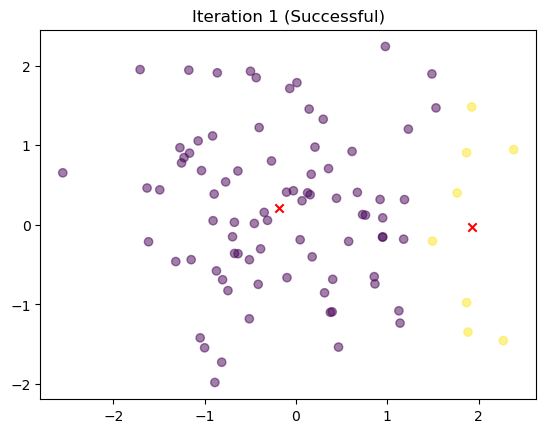

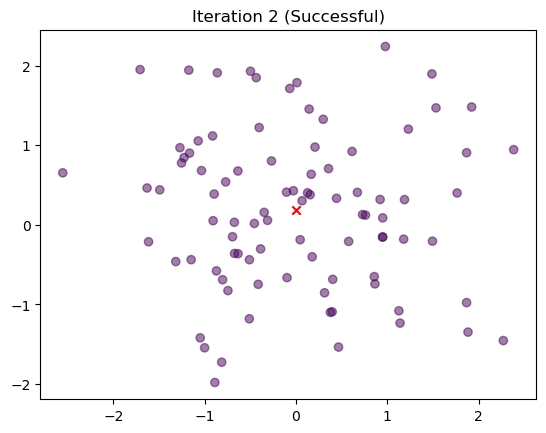

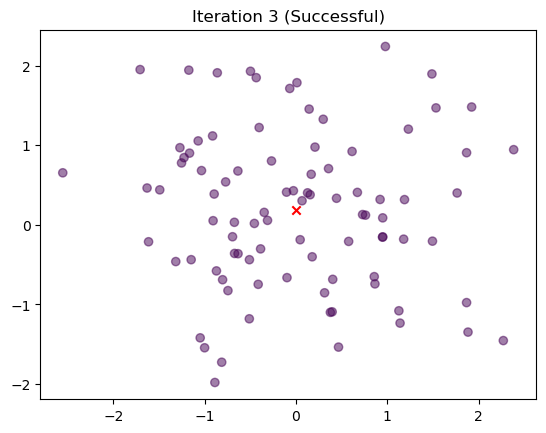

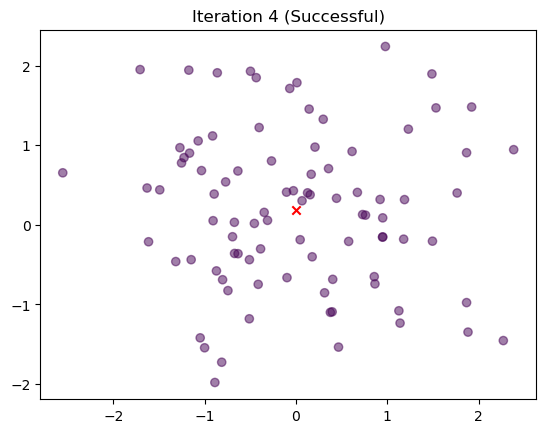

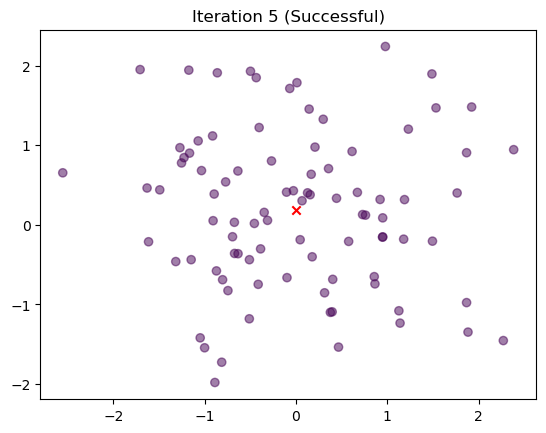

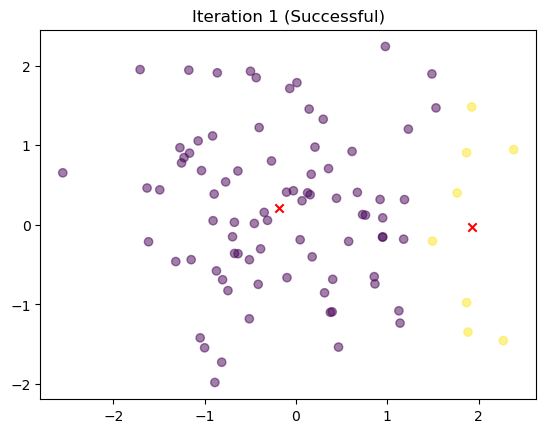

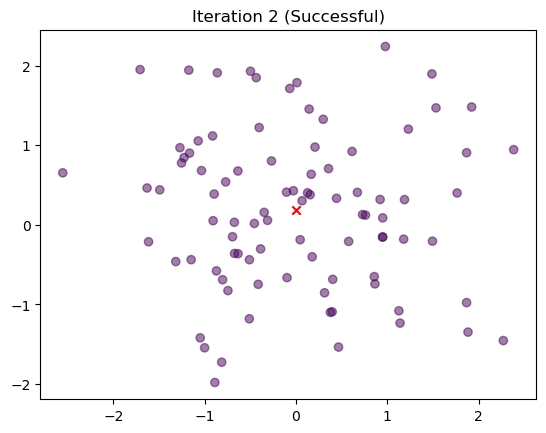

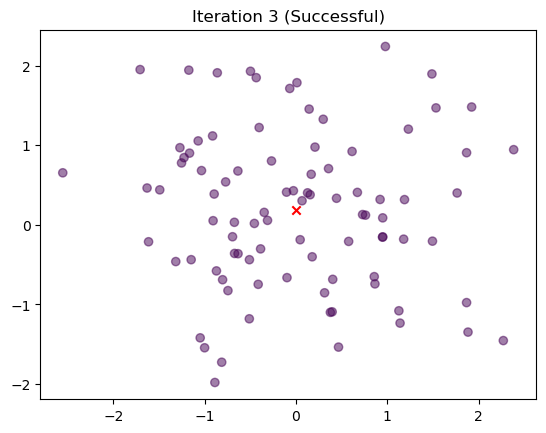

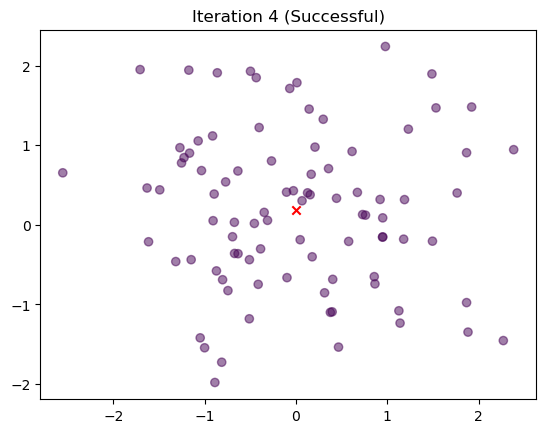

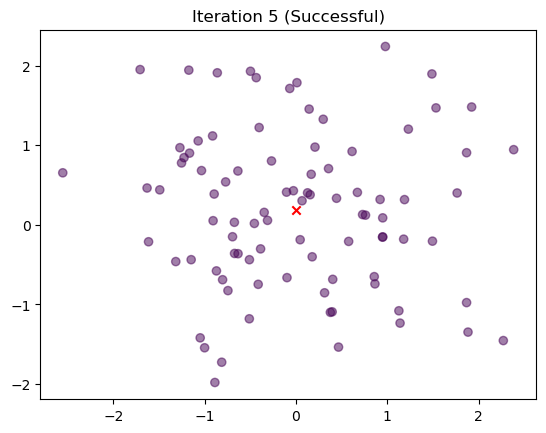

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

class KMeansVisualizer:
    def __init__(self, n_clusters, n_points, n_iterations):
        self.n_clusters = n_clusters
        self.n_points = n_points
        self.n_iterations = n_iterations
        self.points = None
        self.centroids = None
        self.assignments = None

    def initialize(self):
        np.random.seed(0)
        self.points = np.random.randn(self.n_points, 2)
        self.centroids = np.random.randn(self.n_clusters, 2) * 3

    def compute_distances(self):
        distances = np.linalg.norm(self.points[:, None, :] - self.centroids, axis=2)
        self.assignments = np.argmin(distances, axis=1)

    def update_centroids(self):
        new_centroids = np.array([self.points[self.assignments == k].mean(axis=0) for k in range(self.n_clusters)])
        if np.all(new_centroids == self.centroids):
            return False
        self.centroids = new_centroids
        return True

    def visualize(self, iteration, success):
        plt.figure()
        plt.scatter(self.points[:, 0], self.points[:, 1], c=self.assignments, cmap='viridis', alpha=0.5)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x')
        title = f"Iteration {iteration}"
        if success:
            title += " (Successful)"
        else:
            title += " (Unsuccessful)"
        plt.title(title)
        plt.show()

    def run(self):
        self.initialize()
        success_count = 0
        for i in range(self.n_iterations):
            self.compute_distances()
            success = self.update_centroids()
            if success:
                success_count += 1
            self.visualize(i+1, success)
            if success_count == 5:
                break


if __name__ == '__main__':
    for i in range(5):
        visualizer = KMeansVisualizer(n_clusters=3, n_points=90, n_iterations=10)
        visualizer.run()


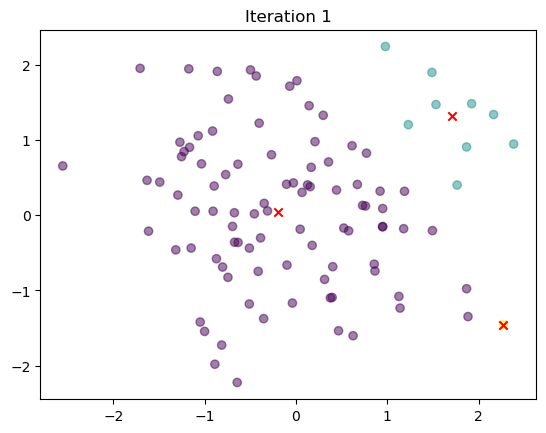

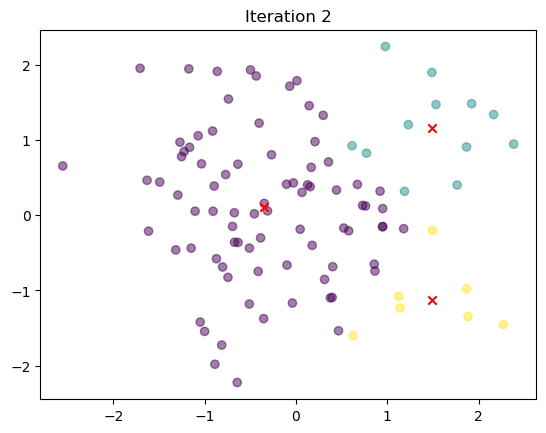

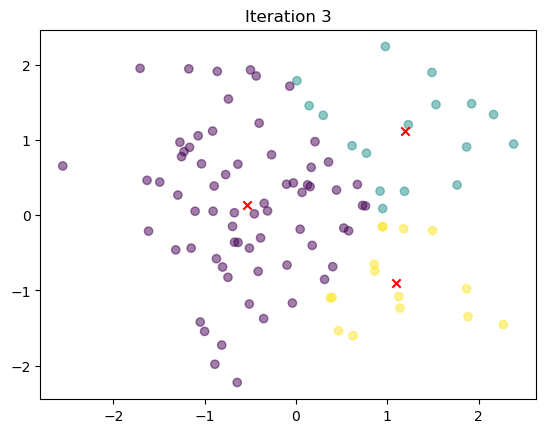

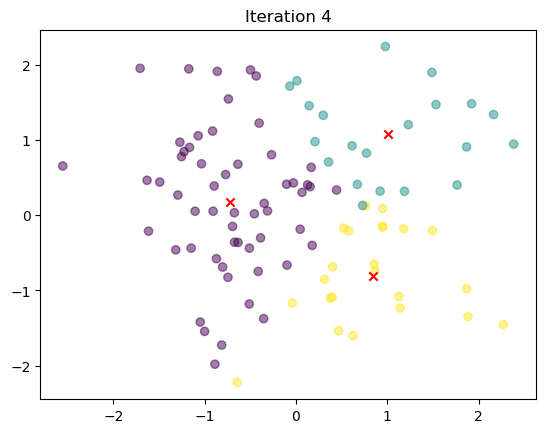

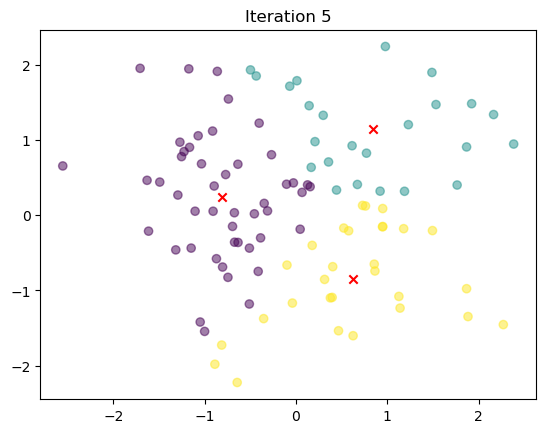

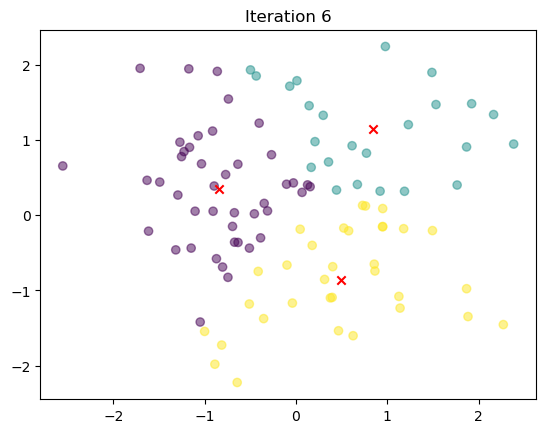

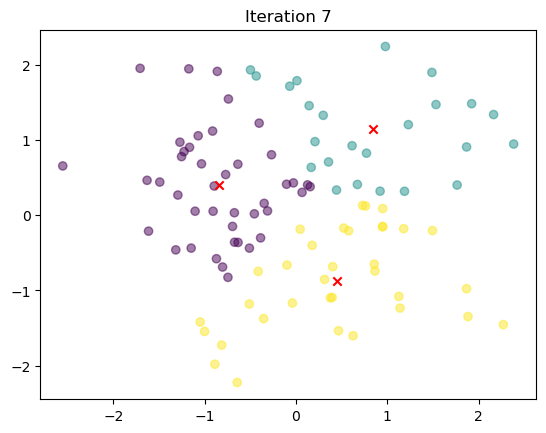

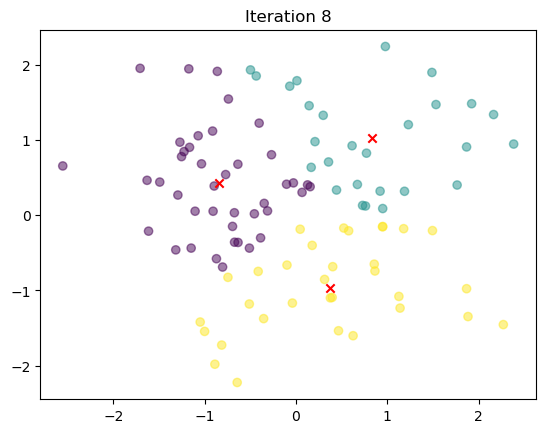

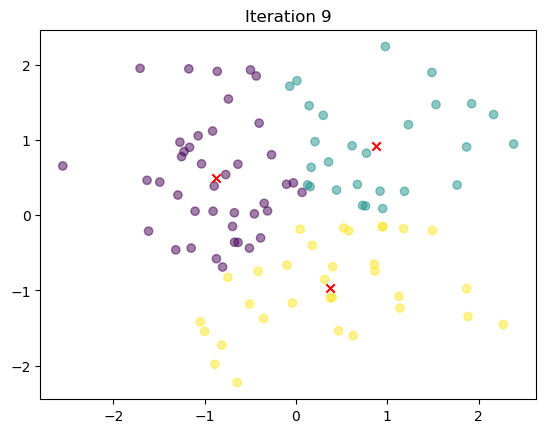

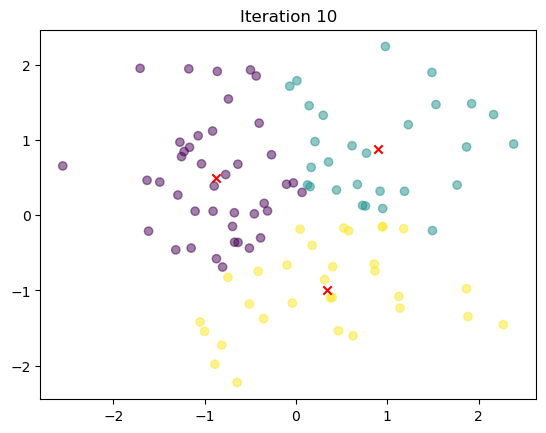

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class KMeansVisualizer:
    def __init__(self, n_clusters, n_points, n_iterations):
        self.n_clusters = n_clusters
        self.n_points = n_points
        self.n_iterations = n_iterations
        self.points = None
        self.centroids = None
        self.assignments = None

    def initialize(self):
        np.random.seed(0)
        self.points = np.random.randn(self.n_points, 2)
        self.centroids = np.random.randn(self.n_clusters, 2) * 3

    def compute_distances(self):
        distances = np.linalg.norm(self.points[:, None, :] - self.centroids, axis=2)
        self.assignments = np.argmin(distances, axis=1)

    def update_centroids(self):
        new_centroids = np.array([self.points[self.assignments == k].mean(axis=0) for k in range(self.n_clusters)])
        self.centroids = new_centroids

    def visualize(self, iteration):
        plt.figure()
        plt.scatter(self.points[:, 0], self.points[:, 1], c=self.assignments, cmap='viridis', alpha=0.5)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x')
        plt.title(f"Iteration {iteration}")
        plt.show()

    def run(self):
        self.initialize()
        for i in range(self.n_iterations):
            self.compute_distances()
            self.update_centroids()
            self.visualize(i+1)


if __name__ == '__main__':
    visualizer = KMeansVisualizer(n_clusters=3, n_points=100, n_iterations=10)
    visualizer.run()


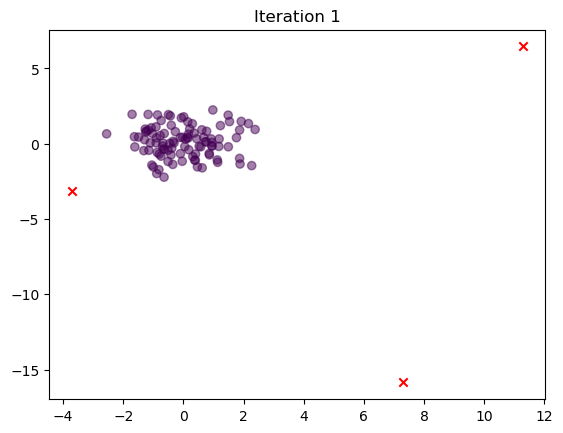

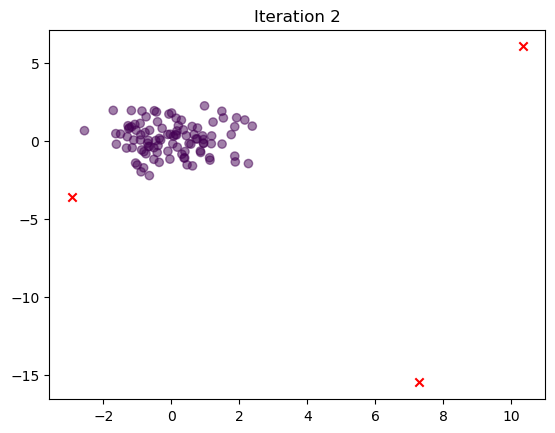

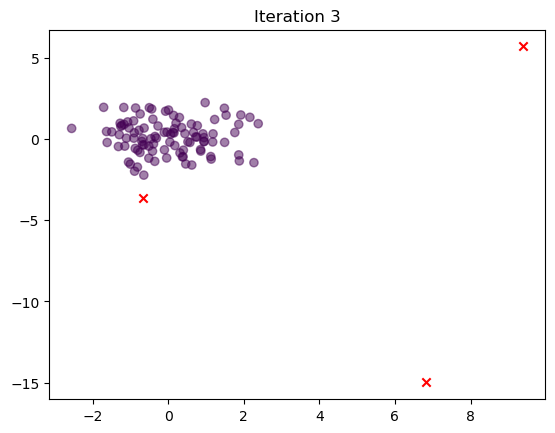

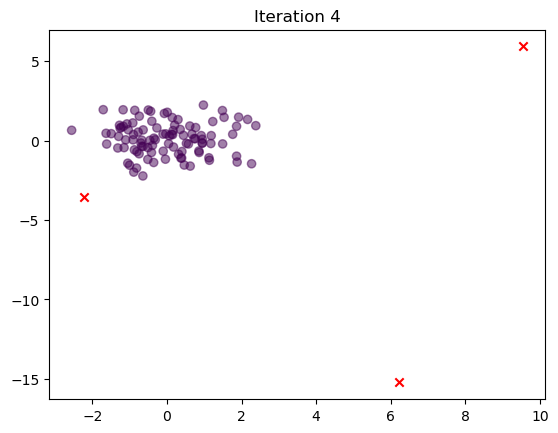

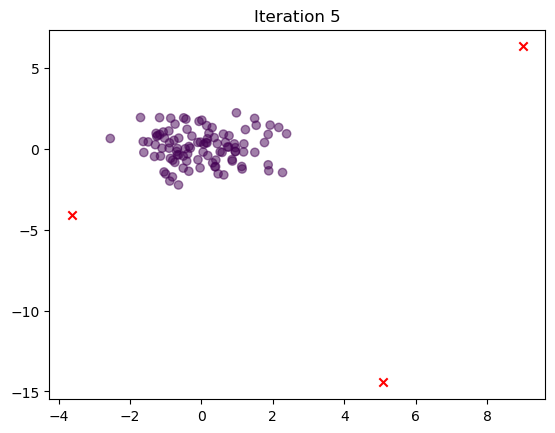

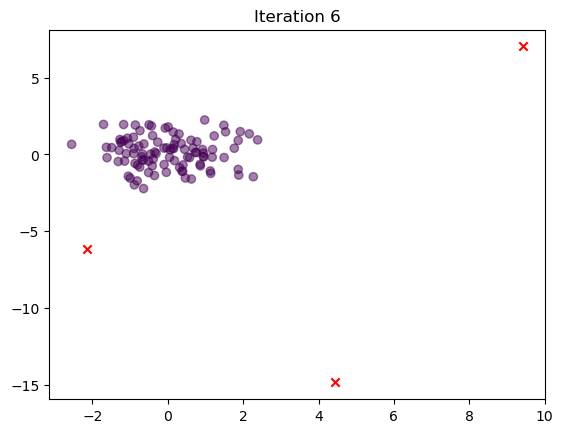

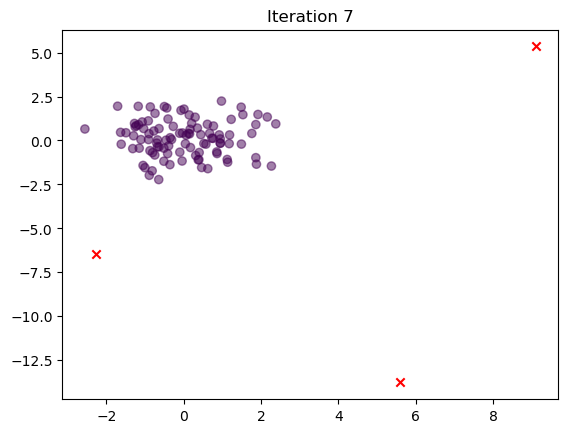

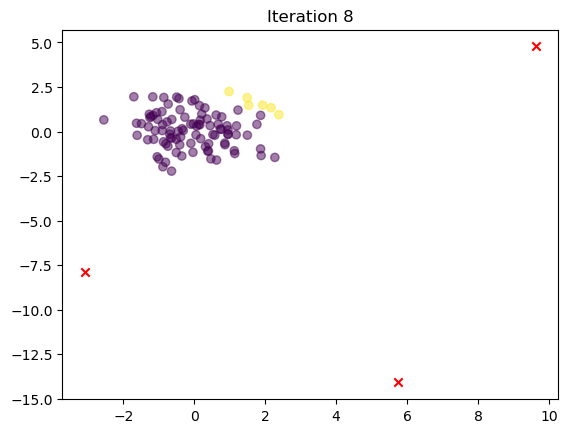

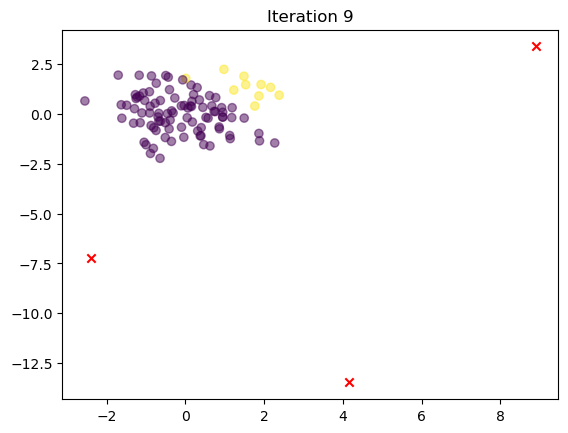

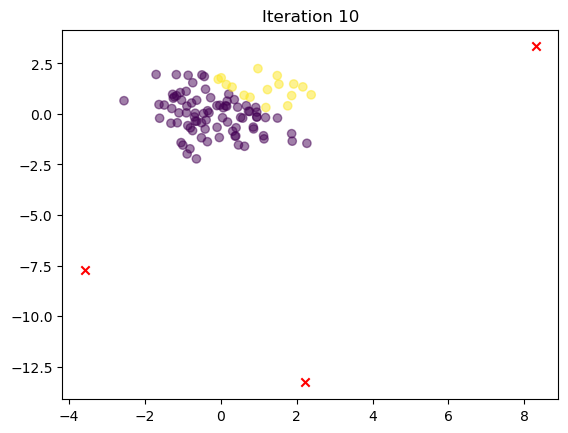

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class KMeansVisualizer:
    def __init__(self, n_clusters, n_points, n_iterations):
        self.n_clusters = n_clusters
        self.n_points = n_points
        self.n_iterations = n_iterations
        self.points = None
        self.centroids = None
        self.assignments = None

    def initialize(self):
        np.random.seed(0)
        self.points = np.random.randn(self.n_points, 2)
        self.centroids = np.random.randn(self.n_clusters, 2) * 10

    def compute_distances(self):
        distances = np.linalg.norm(self.points[:, None, :] - self.centroids, axis=2)
        self.assignments = np.argmin(distances, axis=1)

    def update_centroids(self):
        random_shift = np.random.randn(self.n_clusters, 2)
        self.centroids += random_shift

    def visualize(self, iteration):
        plt.figure()
        plt.scatter(self.points[:, 0], self.points[:, 1], c=self.assignments, cmap='viridis', alpha=0.5)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x')
        plt.title(f"Iteration {iteration}")
        plt.show()

    def run(self):
        self.initialize()
        for i in range(self.n_iterations):
            self.compute_distances()
            self.update_centroids()
            self.visualize(i+1)


if __name__ == '__main__':
    visualizer = KMeansVisualizer(n_clusters=3, n_points=100, n_iterations=10)
    visualizer.run()
